# Проект "Принятие решений в бизнесе на основе данных"

**Описание и задачи проекта: Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.**

## Приоритизация гипотез

**В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Требуется выбрать из них наиболее приоритетные методами ICE и RICE для того, чтобы эффект от их реализации, а именно: выручка компании была максимальной.**

### Импортируем необходимые библиотеки: 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta

In [2]:
hyp_data = pd.read_csv('/datasets/hypothesis.csv')
hyp_data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [3]:
hyp_data['ICE'] =(hyp_data['Impact']*hyp_data['Confidence'])/hyp_data['Efforts']

hyp_data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


**Вывод: Наиболее перспективные гипотезы по ICE: 8, 0, 7,6**

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
hyp_data['RICE'] =(hyp_data['Reach']*hyp_data['Impact']*hyp_data['Confidence'])/hyp_data['Efforts']

hyp_data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод: наиболее перспективные гипотезы по RICE: 7,2, 0, 6. На первом месте уже гипотеза №7. Так получилось потому, что ее параметр Reach равен 10. Важно учитывать, сколько пользователей затронет гипотеза.**

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении обеих методов самыми приоритетными являются гипотезы 0, 6, 7:
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей', 
- 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию', 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. 

При применении RICE вместо ICE уходит гипотеза 'Запустить акцию, дающую скидку на товар в день рождения', у данной гипотезы большое влияние (impact=9) и уверенность (confidence=9), но охват небольшой (reach=1), т.к. у каждого посетителя день рождения 1 раз в году, соответственно, эта акция охватит слишком узкую категорию пользователей. 

При применении RICH в приоритетных появляется гипотеза 2: 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа', она с большой долей уверенности (confidenct=7) охватит много пользователей (reach=8) при невысоких  затратах (efforts=3). 

# Часть 2. Анализ A/B-теста

**Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.**

In [5]:
#откроем файлы orders и  visitors и приведем дату к формату datetime:

orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.head(5))
print()
print(visitors.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B

        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


**Посмотрим, сколько времени длился эксперимент:**

In [6]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [7]:
print('Дата начала теста:', visitors['date'].min())
print('Дата окончания теста:', visitors['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


**Вывод: А/В тест проводили в течение одного месяца: с 1 по 31 августа 2019 года.**

In [8]:
#выведем на экран информацию о датафреймах, убедимся в отсуствии пропусков и дубликатов в них:

print(orders.info())
print()
print(visitors.info())
print()
print('Дубликатов в датафрейме orders:', orders.duplicated().sum()) #проверим датасет на наличие дубликатов
print()
print('Дубликатов в датафрейме visitors:', visitors.duplicated().sum()) #проверим датасет на наличие дубликатов


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None

Дубликатов в датафрейме orders: 0

Дубликатов в датафр

<div class="alert alert-block alert-info">
  
Исследуем пересечение групп:
</div>

In [9]:
#выведем на экран дубликаты по столбцу visitorId
duplicateRows = orders[orders.duplicated(['visitorId'])]
duplicateRows.sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
1102,1941707234,199603092,2019-08-12,6438,A
134,62794304,199603092,2019-08-22,6976,A
...,...,...,...,...,...
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A


**В датафрейме видим, что некоротые пользователи совершили несколько заказов в одной группе, но есть и такие, где заказы одного и того же visitorId попали в группы А и В.**

In [10]:
#создадим сводную таблицу дубликатов со столбцами А и В. Если в одном из столбцов NaN - все в порядке, такой 
#пользователь сделал несколько заказов в одной группе
dup_pivot=duplicateRows.pivot_table(index='visitorId', columns='group', values='transactionId', aggfunc='count')

#нас интересуют visitorId, заказы которых попали в обе группы. Их следует удалить.
dup_pivot=dup_pivot.dropna()
dup_pivot.sort_values(by='visitorId')

group,A,B
visitorId,,
199603092,3.0,1.0
457167155,1.0,2.0
1230306981,2.0,2.0
1404934699,1.0,1.0
1668030113,1.0,1.0
2038680547,5.0,2.0
2378935119,3.0,5.0
2458001652,4.0,6.0
2587333274,1.0,2.0


In [11]:
#удалим из датафрейма orders строки с visitorId, которые попали в обе группы, и перезапишем датафрейм
orders=orders.query('visitorId not in (199603092, 457167155, 1230306981, 1404934699, 1668030113, 2038680547, \
2378935119, 2458001652, 2587333274, 2780786433, 3062433592, 3717692402, 3891541246, 4186807279, 4256040402)')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<div class="alert alert-block alert-info">
  
Дубликаты id, которые попали в обе группы удалила, перезаписала датафрейм orders, теперь в нем осталась 1115 строк вместо 1197  изначальных.
</div> 

## Анализ результатов A/B-теста:

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

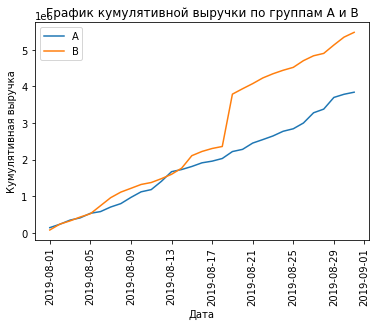

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки для групп А и В
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=90) # здесь можно установить угол поворота подписей по оси X
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам А и В')
plt.show()

**Вывод: по графику видим, что накопительная выручка в сегменте В до середины теста чуть выше, чем в сегменте А, а с середины теста сегмент В уверенно лидирует. (Возможно, на результат повлияли аномально крупные заказы, это следует проанализировать ниже).**

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

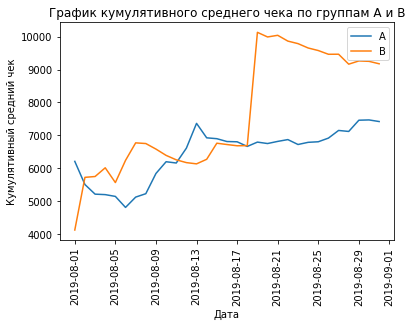

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xticks(rotation=90) # здесь можно установить угол поворота подписей по оси X
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам А и В')
plt.show()

**Вывод: кумулятивное значение среднего чека по сегментам А и В не стабильно. Также заметен сильный скачок в сегменте В с 6500 до 10000 ед. во второй половине теста (если быть точнее, то 18.08.2019), который, возможно вызван аномально большим заказом в этой группе. Требуется далее дополнительно провести анализ выбросов.**

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

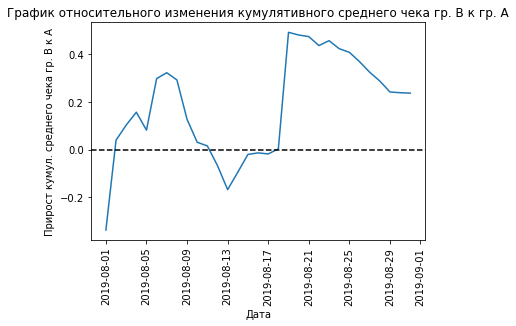

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',\
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90) # здесь можно установить угол поворота подписей по оси X
plt.ylabel('Прирост кумул. среднего чека гр. B к A')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека гр. B к гр. A')
plt.show()

**Вывод: По графику видим, что в начале исследования средний чек в группе А был выше, чем в группе В. Далее видим, увеличение среднего чека в сегменте В по отношению к сегменту А. В середине теста (13.08.2019) сначала наблюдаем падение кумулятивного чека группы В относительно А, а затем резкий скачок вверх 18.08.2019. Резкие пики в нескольких датах дают нам право предположить, что  именно тогда были совершены аномальные заказы.** 

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

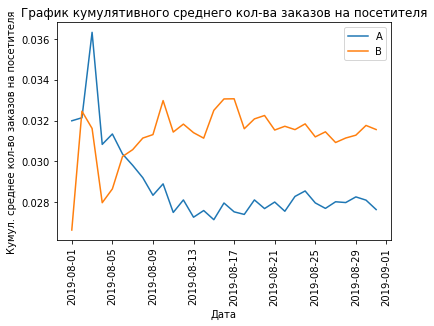

In [15]:
# считаем кумулятивное срденее количество заказов на посетителя по группам (конверсию):
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=90) # здесь можно установить угол поворота подписей по оси X
plt.ylabel('Кумул. среднее кол-во заказов на посетителя')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего кол-ва заказов на посетителя')

plt.show()

**Вывод: В начале исследования среднее количество заказов на пользователя (конверсия) было лучше в группе А, но 6.08.2019 конверсия группы В пошла в заметный рост относительно гр.А, затем немного замедлилась и пошла на небольшой спад, но все равно была выше конвесии группа А, которая после спада  6.08.2019 так и держалась на постоянном низком уровне.** 

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

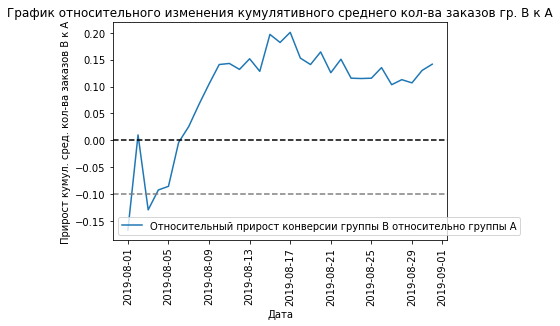

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xticks(rotation=90) # здесь можно установить угол поворота подписей по оси X
plt.ylabel('Прирост кумул. сред. кол-ва заказов B к A')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего кол-ва заказов гр. B к A')
plt.show()


**Вывод: в первые несколько дней исследования группа B то проигрывала, то выигрывала у группы A, затем 6.08.2019 вырвалась вперёд. Потом её конверсия колебалась с тенденцией к легкому падению, но к концу месяца видим небольшой рост. Чтобы сделать выводы следует также проанализировать аномалии, возможно, они изменят картину.**   

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. Посчитайте 95-й и 99-й перцентили. Выберите границу для определения аномальных пользователей.

In [17]:
#сгруппируем пользователей по количеству заказов и отсортируем от большего к меньшему
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


      visitorId  orders
905  3803269165       5
54    237748145       5
389  1614305549       4
308  1294878855       3
58    249864742       3
924  3908431265       3
498  2108163459       3
716  2988190573       3
950  3984495233       3
96    393266494       3


Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

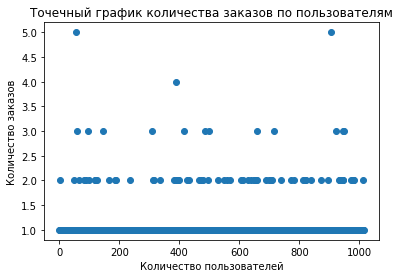

In [18]:
# построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('Точечный график количества заказов по пользователям')

**Вывод: на точечном графике видим, что большая часть пользователей сделала 1 заказ, чуть меньше 2 заказа. Далее количество заказов на пользователя убывает. Наблюдаем достаточное количество выбросов: пользователей, которые сделали 3 заказа и больше.** 

In [19]:
#посчитаем 95-й и 99-й перцентили количества заказов на пользователя, выберем границу для определения аномальных заказов.
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 3.])

**Вывод:не более 5% пользователей совершали более 2 заказов и не более 1% пользователей более 3 заказов. В качестве границы для определения аномального количества заказов выберем значение 3.**

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [20]:
#сгруппируем пользователей по сумме заказа и отсортируем от большего к меньшему
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'})
)

ordersByUsers.columns = ['visitorId', 'revenue']

print(ordersByUsers.sort_values(by='revenue', ascending=False).head(10))

       visitorId  revenue
458   1920142716  1294500
497   2108080724   202740
1011  4266935830   157980
313   1316129916    94770
311   1307669133    92550
211    888512513    86620
184    759473111    72000
980   4133034833    67990
716   2988190573    67190
277   1164614297    66350


Text(0.5, 1.0, 'Точечный график стоимости заказов по пользователям')

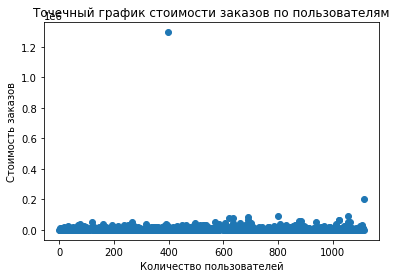

In [21]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.title('Точечный график стоимости заказов по пользователям')

**Вывод: наблюдаем два явных выброса: аномально крупные заказы в группе В: на 1 294 500 р. и 202 740 р.**

In [22]:
# посчитаем 95-й и 99-й перцентили стоимости заказов, выберем границу для определения аномальных заказов.
np.percentile(ordersByUsers['revenue'], [90, 95, 99])

array([18945.  , 30746.75, 64921.  ])

**Вывод: Не более 5% пользователей сделали заказы свыше 31 000р и не более 1% пользователей свыше 65000 р. Примем за аномальный заказ стоимостью более 50 000.**

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

**Выдвинем нулевую и альтернативную гипотезы:**
- Н0: различий в среднем количестве заказов на посетителя между группами А и В нет.
- Н1: различия в среднем количестве заказов на посетителя между группами А и В есть.

*Значение статистической значимости примем 0.05.*

In [23]:
import scipy.stats as stats
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединим таблицы в одну
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

#cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, 
#которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print()
print('p_value сыр.:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего количества заказов группы В к группе А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,19,78258,19,142779,19,78258,719,713,719,713
1,2019-08-02,19,93822,23,162043,38,236601,42,240301,619,581,1338,1294
2,2019-08-03,24,112473,15,87268,62,349074,57,327569,507,509,1845,1803
3,2019-08-04,12,61395,15,105291,74,410469,72,432860,717,770,2562,2573
4,2019-08-05,25,124218,22,90008,99,534687,94,522868,756,707,3318,3280



p_value сыр.: 0.01526
Относительный прирост среднего количества заказов группы В к группе А: 0.142


**Вывод: p-value меньше 0.05, предварительно по сырым данным нулевую гипотезу отвергаем. Среднее количество заказов в группах А и Б не равны. Относительный прирост среднего количества заказов на пользователя группы В к группе А 14.2%. Также следует сравнить средние чеки, а затем обе метрики еще раз после удаления выбросов.** 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Выдвинем нулевую и альтернативную гипотезы:**
- Н0: различий в среднем чеке между группами А и В нет.
- Н1: различия в среднем чеке между группами А и В есть.

*Значение статистической значимости примем 0.05.*

In [24]:
print('p-value сыр:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы В к группе А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value сыр: 0.940
Относительный прирост среднего чека группы В к группе А: 0.237


Вывод: По «сырым» данным различий в среднем чеке групп A и B нет. p-value = 0.940, больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Однако видим, что относительное различие среднего чека 24% в пользу категории В, это может быть обусловлено заказами аномальных пользователей, выводы по относительному различию в среднем чеке будем делать после очистки данных.

    
Тут все просто. Раз теcт показал, что нет стат значимой разницы между группами - то каково бы различие чека не было, оно не будет являться стат. значимым (у нас тут выбросы дают большое различие чеков, но их всего несколько и на общее различие среднего чека по группам они не влияют)

**ОЧИСТКА ДАННЫХ**

**Для начала  проведем очистку данных от аномалий: согласно п.2.6, 2.8 аномальными будем считать пользователей, которые совершили покупку свыше 50 000 р и более 3 заказов.**

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#пользователи с множеством заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
#пользователи с дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']

#объединим пользователей с множеством заказов с пользователями с дорогими заказами
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print()
print('Количество аномальных пользователей:', abnormalUsers.shape[0]) #узнаем количество аномальных пользователей

1099    148427295
22      237748145
1137    759473111
949     887908475
744     888512513
Name: visitorId, dtype: int64

Количество аномальных пользователей: 19


**Вывод: отфильтруем ниже 19 аномальных пользователей, которые либо сделали больше 3 заказов, либо сумма заказов которых превысила 50 000р.**

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

**Выдвинем нулевую и альтернативную гипотезы:**
- Н0: различий в среднем количестве заказов на посетителя между группами А и В нет.
- Н1: различия в среднем количестве заказов на посетителя между группами А и В есть.

*Значение статистической значимости примем 0.05.*

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value очищ.:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов группы В к группе А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value очищ.: 0.011
Относительный прирост среднего количества заказов группы В к группе А: 0.154


**Вывод: по очищенным данным отвергаем нулевую гипотезу: среднее количество заказов в группах А и В разное. Прирост количества заказов группы В к группе А 15.4%.**

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. 

**Выдвинем нулевую и альтернативную гипотезы:**
- Н0: различий в среднем чеке между группами А и В нет.
- Н1: различия в среднем чеке между группами А и В есть.

*Значение статистической значимости примем 0.05.*

In [27]:
print('p-value очищ.',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Прирост среднего чека группы В относительно группы А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value очищ. 0.907
Прирост среднего чека группы В относительно группы А: 0.011


**Вывод: По очищенным данным различий в среднем чеке между группами А и В нет: p-value 0.907, больше 0.05. Значит, гипотезу о равенcтве среднего чека в группах А и Б не отвергаем. Прирост среднего чека 1,1% (сравним с приростом 24% по "сырым"данным! - они точно были обусловлены заказами аномальных пользователей). Средние чеки в группах А и В равны.**

### Примите решение по результатам теста и объясните его. 

1. Останавливаем тест, фиксируем победу группы В: несмотря на равенство средних чеков в группах, в сегменте В пользователи стали делать больше заказов, конверсия увеличилась на 15% .


## Общий вывод по проекту

**Часть 1. Приоритизация гипотез.**

**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

*Наиболее перспективные гипотезы по ICE: 8, 0, 7,6*

**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

*Вывод: наиболее перспективные гипотезы по RICE: 7,2, 0, 6. На первом месте уже гипотеза №7. Так получилось потому, что ее параметр Reach равен 10. Важно учитывать, сколько пользователей затронет гипотеза.*


**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

*При применении обеих методов самыми приоритетными являются гипотезы 0, 6, 7:*
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей', 
- 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию', 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. 

При применении RICE вместо ICE уходит гипотеза 'Запустить акцию, дающую скидку на товар в день рождения', у данной гипотезы большое влияние (impact=9) и уверенность (confidence=9), но охват небольшой (reach=1), т.к. у каждого посетителя день рождения 1 раз в году, соответственно, эта акция охватит слишком узкую категорию пользователей. 

При применении RICH в приоритетных появляется гипотеза 2: 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа', она с большой долей уверенности (confidenct=7) охватит много пользователей (reach=8) при невысоких  затратах (efforts=3).

**Часть 2. Анализ A/B-теста**

**Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

*По графику кумулятивной выручки видим, что накопительная выручка в сегменте В до середины теста чуть выше, чем в сегменте А, а с середины теста сегмент В уверенно лидирует. (Возможно, на результат повлияли аномально крупные заказы, это следует проанализировать дополнительно).*

**Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

*Кумулятивное значение среднего чека по сегментам А и В не стабильно. Также заметен сильный скачок в сегменте В с 6500 до 10000 ед. во второй половине теста (если быть точнее, то 18.08.2019), который, возможно вызван аномально большим заказом в этой группе. Требуется далее дополнительно провести анализ выбросов.*

**Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

*По графику видим, что в начале исследования средний чек в группе А был выше, чем в группе В. Далее видим, увеличение среднего чека в сегменте В по отношению к сегменту А. В середине теста (13.08.2019) сначала наблюдаем падение кумулятивного чека группы В относительно А, а затем резкий скачок вверх 18.08.2019. Резкие пики в нескольких датах дают нам право предположить, что  именно тогда были совершены аномальные заказы.*

**Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

*В начале исследования среднее количество заказов на пользователя (конверсия) было лучше в группе А, но 6.08.2019 конверсия группы В пошла в заметный рост относительно гр.А, затем немного замедлилась и пошла на небольшой спад, но все равно была выше конвесии группа А, которая после спада  6.08.2019 так и держалась на постоянном низком уровне.*

**Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

*В первые несколько дней исследования группа B то проигрывала, то выигрывала у группы A, затем 6.08.2019 вырвалась вперёд. Потом её конверсия колебалась с тенденцией к легкому падению, но к концу месяца видим небольшой рост. Чтобы сделать выводы следует также проанализировать аномалии, возможно, они изменят картину.*

**Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

*На точечном графике видим, что большая часть пользователей сделала 1 заказ, чуть меньше 2 заказа. Далее количество заказов на пользователя убывает. Наблюдаем достаточное количество выбросов: пользователей, которые сделали 3 заказа и больше.*

**Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

*Не более 5% пользователей совершали более 2 заказов и не более 1% пользователей более 3 заказов. В качестве границы для определения аномального количества заказов выберем значение 3.*

**Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

*Наблюдаем два явных выброса: аномально крупные заказы в группе В: на 1 294 500 р. и 202 740 р.*

**Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

*Вывод: Не более 5% пользователей сделали заказы свыше 31 000р и не более 1% пользователей свыше 65000 р. Примем за аномальный заказ стоимостью более 50 000.*

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
Сделайте выводы и предположения.**

*Выдвинем нулевая гипотезу: различий в среднем количестве заказов на посетителя между группами А и В нет. Значение статистической значимости примем 0.05. По расчету p-value меньше 0.05, предварительно по сырым данным нулевую гипотезу отвергаем. Среднее количество заказов в группах А и Б не равны. Относительный прирост среднего количества заказов на пользователя группы В к группе А 14.2%. Также следует сравнить средние чеки, а затем обе метрики еще раз после удаления выбросов.*

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

*Нулевая гипотеза: различий в среднем чеке между группами А и В нет. Значение статистической значимости примем 0.05. По «сырым» данным различий в среднем чеке групп A и B нет. p-value = 0.940, больше 0.05. Значит, предварительно нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Относительное различие среднего чека 24% в пользу категории В. Вернемся к среднему чеку после очистки данных.*

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

*По очищенным данным отвергаем нулевую гипотезу: среднее количество заказов в группах А и В разное. Прирост количества заказов группы В к группе А 15.4%.*

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

*По очищенным данным различий в среднем чеке между группами А и В нет: p-value 0.907, больше 0.05. Значит, гипотезу о равенcтве среднего чека в группах А и Б не отвергаем. Прирост среднего чека 1,1% (сравним с приростом 24% по "сырым"данным! - они точно были обусловлены заказами аномальных пользователей). Средние чеки в группах А и В равны.*

**Примите решение по результатам теста и объясните его.**

*1. Останавливаем тест, фиксируем победу группы В: несмотря на равенство средних чеков в группах, в сегменте В пользователи стали делать больше заказов, конверсия увеличилась на 15%.*